### Testing something 

#### Data Preprocessing 

In [71]:
# Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [83]:
#importing datasets
train_df = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Combinding the datasets 
df = pd.concat([train_df, test_df])

In [85]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [74]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [75]:
# Checking for missing values 
print(train_df.isna().sum())
print(test_df.isna().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [76]:
# Handling missing values 
train_df.dropna(inplace=True)

In [77]:
# Checking for outliers 
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [78]:
test_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
# Creating dummy variables for categorical variables


### PCA; Codes from a paper

https://nextjournal.com/pc-methods/calculate-pc-mixed-data

In [54]:
# Importing modules 
import pandas as pd 
import prince 
import pprint 

In [55]:
#importing datasets
train_df_pca = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df_pca = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [58]:
train_df_pca.dropna(inplace=True)

In [61]:
## Instantiate FAMD object
famd = prince.FAMD(
     n_components=25,
     n_iter=10,
     copy=True,
     check_input=True,
     engine='sklearn',       ## Can be "auto", 'sklearn', 'fbpca'
     random_state=42)

In [62]:
## Fit FAMD object to data 
famd = famd.fit(train_df_pca.drop('Churn', axis=1)) ## Exclude target variable "Churn"

In [69]:
# Calculate explained variance for each component
explained_variance = famd.eigenvalues_ / famd.eigenvalues_.sum()
for i, variance in enumerate(explained_variance):
    print(f"Component {i + 1}: Explained Variance = {variance:.4f}")

Component 1: Explained Variance = 0.1555
Component 2: Explained Variance = 0.0979
Component 3: Explained Variance = 0.0970
Component 4: Explained Variance = 0.0967
Component 5: Explained Variance = 0.0965
Component 6: Explained Variance = 0.0727
Component 7: Explained Variance = 0.0662
Component 8: Explained Variance = 0.0624
Component 9: Explained Variance = 0.0611
Component 10: Explained Variance = 0.0588
Component 11: Explained Variance = 0.0566
Component 12: Explained Variance = 0.0492
Component 13: Explained Variance = 0.0294
Component 14: Explained Variance = 0.0000
Component 15: Explained Variance = 0.0000
Component 16: Explained Variance = 0.0000


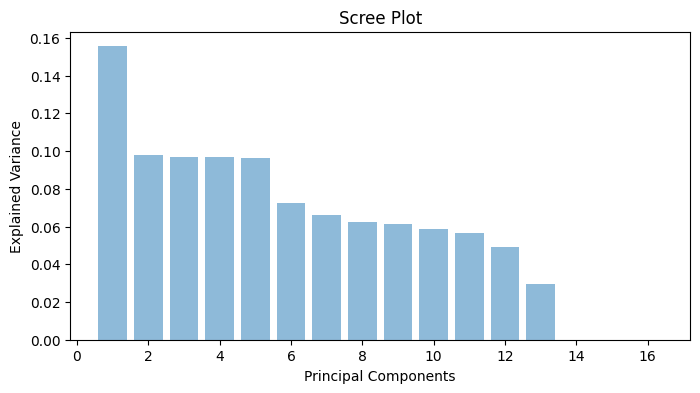

In [70]:
import matplotlib.pyplot as plt

# Calculate explained variance for each component
explained_variance = famd.eigenvalues_ / famd.eigenvalues_.sum()

# Create a Scree Plot
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

### PCA

I should normalize the data 

In [19]:
# Importing modules 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [20]:
#importing datasets
train_df_pca = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df_pca = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [23]:
train_df_pca.dropna(inplace=True)

In [24]:
# Defining the categorical and numerical variables
num = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
cat = ['Gender', 'Subscription Type', 'Contract Length']

In [25]:
# Creating transformers for numerical and categorical features
numeric_tf = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_tf = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combinding the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tf, num),
        ('cat', categorical_tf, cat)
    ])

In [26]:
# Preporcessing and transforming the data 
X_train_pca = preprocessor.fit_transform(train_df_pca.drop(columns=['CustomerID', 'Churn']))
X_test_pca = preprocessor.transform(test_df_pca.drop(columns=['CustomerID', 'Churn']))

In [49]:
# Perform PCA
n_components =5  # You can adjust this based on your needs

pca = PCA(n_components=n_components)
pca.fit(X_train_pca)

train_pca = pca.transform(X_train_pca)
test_pca = pca.transform(X_test_pca)

In [50]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.18155302 0.12690841 0.12183684 0.11974434 0.11635072]


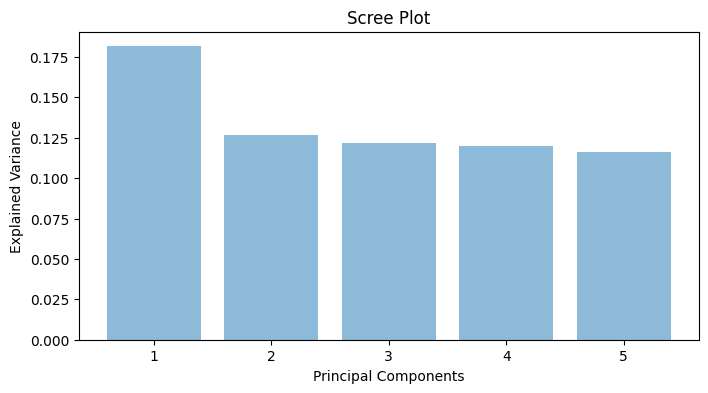

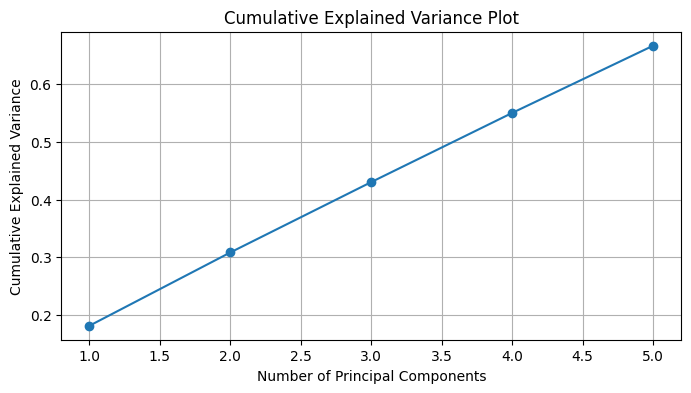

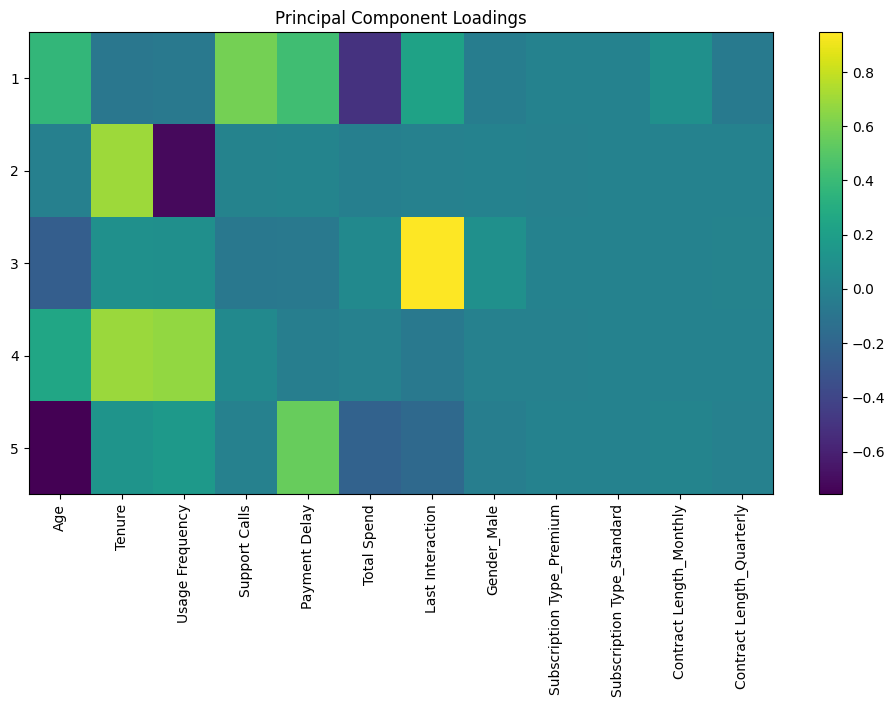

In [51]:
# Visualizations
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

# Manually get feature names for one-hot encoded categorical columns
categorical_encoder = preprocessor.named_transformers_['cat']['onehot']
cat_feature_names = categorical_encoder.get_feature_names_out(input_features=cat)
all_feature_names = num + list(cat_feature_names)

# Create DataFrame for component loadings
components_df = pd.DataFrame(pca.components_, columns=all_feature_names)
plt.figure(figsize=(12, 6))
plt.imshow(components_df, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(range(len(components_df.columns)), components_df.columns, rotation=90)
plt.yticks(range(len(components_df.index)), range(1, len(components_df.index) + 1))
plt.title('Principal Component Loadings')
plt.show()

### Logistic Regression 

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{model_name}: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [3]:
#importing datasets
train_df = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
# Inspecting the data 
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
#figure out how many different values are in the columns with string datatype

unique_gender = train_df["Gender"].unique()

print("Unique values in Gender column:", unique_gender)

unique_subtype = train_df["Subscription Type"].unique()

print("Unique values in Subscription Type column:", unique_subtype)

unique_contractLenght = train_df["Contract Length"].unique()

print("Unique values in Contract Length column:", unique_contractLenght)

Unique values in Gender column: ['Female' 'Male' nan]
Unique values in Subscription Type column: ['Standard' 'Basic' 'Premium' nan]
Unique values in Contract Length column: ['Annual' 'Monthly' 'Quarterly' nan]


In [7]:
# Seeing how many missing values there are
print(train_df.isna().sum())
print(test_df.isna().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [8]:
# Since there are only one missing value, it is feasible to drop this 
train_df.dropna(inplace=True)

In [9]:
# Defining the categorical and numerical variables
num = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
cat = ['Gender', 'Subscription Type', 'Contract Length']

In [10]:
# Creating transformers for numerical and categorical features
numeric_tf = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_tf = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combinding the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tf, num),
        ('cat', categorical_tf, cat)
    ])

In [11]:
# Apply the preprocessing to train and test data
X_train = preprocessor.fit_transform(train_df.drop(columns=['CustomerID', 'Churn']))
y_train = train_df['Churn']
X_test = preprocessor.transform(test_df.drop(columns=['CustomerID', 'Churn']))
y_test = test_df['Churn']

In [12]:
# Initialising Logistic Regression 
lr = LogisticRegression(max_iter=1000000, random_state=9)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, random_state=9)

LogisticRegression(max_iter=1000000, random_state=9)
 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.19      0.32     33881
           1       0.53      0.99      0.69     30493

    accuracy                           0.57     64374
   macro avg       0.74      0.59      0.50     64374
weighted avg       0.75      0.57      0.49     64374

 Confusion Matrix:


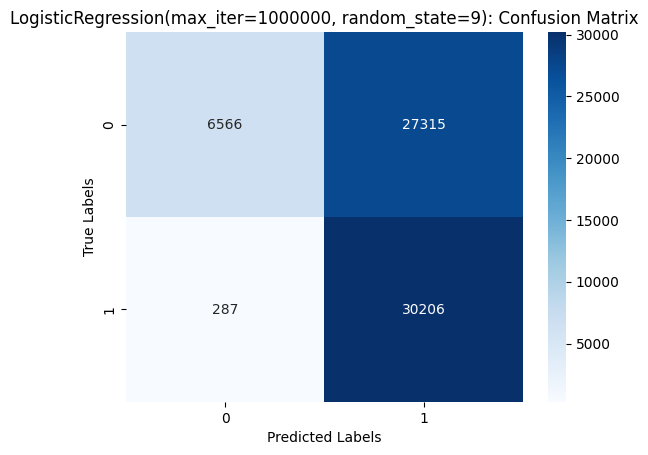

In [17]:
# Evaluating the results 
evaluate(y_test, y_pred, lr)